
# Carga de Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento de los datos

Importamos los datos desde el .csv

In [2]:
#Cargamos los datos leyendo el documento .csv
data = pd.read_csv('pokemon.csv', encoding='UTF-8')
data.head()


,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


Usamos la funcion .shape para ver la forma de nuestro Data Frame. En este caso 20 filas y 8 columnas. Lo que dan 160 datos en total.

In [3]:
data.shape

(20, 8)

Usamos la funcion .dtypes para ver los distintos tipos de datos que tenemos y ver cuales de ellos son utiles.

In [4]:
data.dtypes


Pokémon             object
Tipo                object
PS                   int64
Ataque               int64
Defensa              int64
Ataque especial      int64
Defensa especial     int64
Velocidad            int64
dtype: object

Observamos que las variables "Pokemon" y "Tipo" son variables objeto y no entero. Estas variables habra que limpiarlas para poder estandarizar y efectuar el PCA correctamente. A continuacion verificaremos si hay variables nulas y duplicadas.

In [5]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [6]:
data.isnull().values.any() # Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

False

Observamos que no hay variables nulas ni duplicadas. 

A continuacion eliminamos las variables de tipo 'object' para poder seguir analizando los datos. Si no hay exclusivamente datos numericos no podremos buscar outliers o posteriormente hacer PCA. 

El DataFrame tras la eliminacion de las variables no numericas queda de la siguiente forma:

In [7]:
data=data.drop(["Pokémon","Tipo"],axis=1)
data.head()


,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,2,3,2,4,2,4
1,2,3,2,2,2,3
2,2,3,4,3,2,1
3,3,5,3,4,3,4
4,2,3,3,4,2,4


A continuacion representamos cada variable en un diagrama de bigotes en busca de un Outlier.

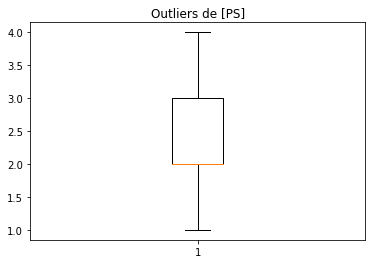

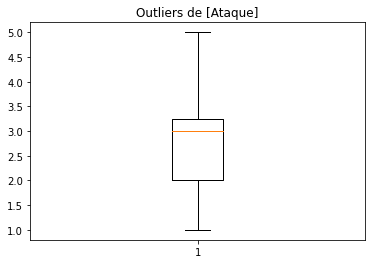

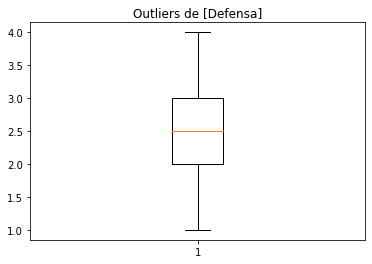

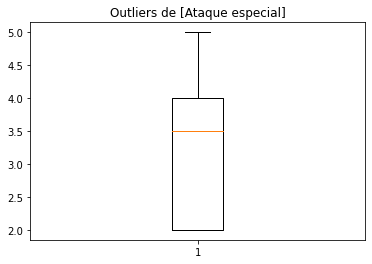

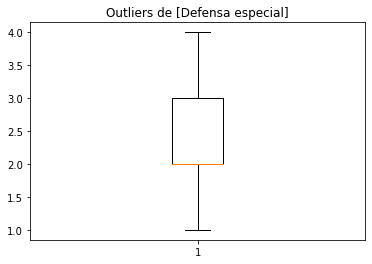

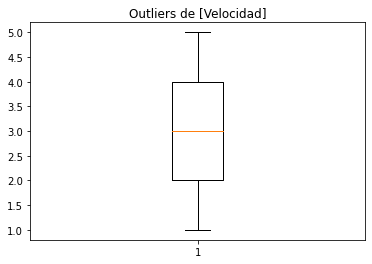

In [8]:
for i in data.columns:
  arr = data[i]
  plt.boxplot(arr)
  plt.title("Outliers de [{0}]".format(i))
  plt.show()

Podemos observar que no hay Outliers en ninguna de las variables restantes por tanto ya hemos finalizado con esta parte de preprocesameinto de datos.

# Normalizacion de datos

In [9]:
#Normalizamos los datos para que ....
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_transformed = ss.fit_transform(data)
data_transformed = pd.DataFrame(data = data_transformed, 
                        columns = ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"])
data_transformed



,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


Una vez estan Normalizados los datos podemos proceder a calcular la matriz de correlacion y covarianza. Calculamos las dos ya que dependiendo de como esten estandarizados nuestros datos usaremos la mariz de correlacion o la de covarinza. Usamos la funcion de pandas cov y corr para calcular dichas matrices.

In [10]:
data_cov=data_transformed.cov()
data_cov

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
PS,1.052632,0.466179,0.085833,0.491676,0.429163,0.232414
Ataque,0.466179,1.052632,0.543125,0.166228,0.385905,0.250269
Defensa,0.085833,0.543125,1.052632,0.102781,0.509868,-0.249399
Ataque especial,0.491676,0.166228,0.102781,1.052632,0.411123,0.496827
Defensa especial,0.429163,0.385905,0.509868,0.411123,1.052632,0.190018
Velocidad,0.232414,0.250269,-0.249399,0.496827,0.190018,1.052632


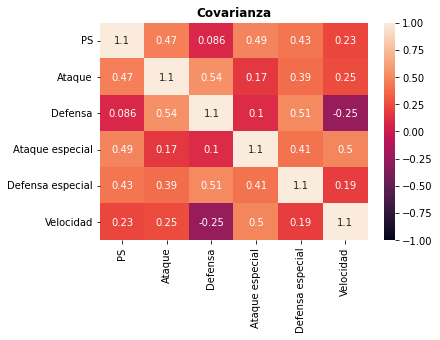

In [11]:
ax = plt.axes()
sns.heatmap(data_transformed.cov(),vmin=-1, vmax=1, annot=True);
ax.set_title('Covarianza',weight='bold')
plt.show()

En el mapa de calor observamos que las variables ataque y defensa son las que mas relacionadas estan ente si con un valor de 0.54. Esto quiere decir que la relacion entre estas dos variables es alta o lo que es lo mismo un pokemon con mucho ataque tendra mucha defensa. 

Ademas vemos que con la matriz de covarinza no es uno en la diagonal y que la suma de los autovalores no es igual al numero de variables que tenemos, 6. No obstante se acerca a ambos valores asi que tenemos que comparalo con la matriz de correlacion para ver si esta es mas optima.  



**COMPARAR SUMA DE AUTOVALORES**

In [12]:
from numpy import linalg
autoval_cov, autovec_cov= np.linalg.eig(data_cov)
print("Los autovalores de la matriz de covarianza son:\n")
print(autoval_cov)
print("\nEl autovector de la matriz de covarianza son:\n")
print(autovec_cov)

Los autovalores de la matriz de covarianza son:

[2.62997944 1.55066147 0.16420572 0.47459774 0.71552145 0.78082366]

El autovector de la matriz de covarianza son:

[[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]]


In [13]:
data_corr=data_transformed.corr()
data_corr

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
PS,1.000000,0.442870,0.081541,0.467092,0.407705,0.220794
Ataque,0.442870,1.000000,0.515969,0.157917,0.366610,0.237756
Defensa,0.081541,0.515969,1.000000,0.097642,0.484375,-0.236929
Ataque especial,0.467092,0.157917,0.097642,1.000000,0.390567,0.471986
Defensa especial,0.407705,0.366610,0.484375,0.390567,1.000000,0.180517
Velocidad,0.220794,0.237756,-0.236929,0.471986,0.180517,1.000000


Para visualizar mejor como se correlacionan los datos vamos a usar la libreria seaborn para crear un mapa de calor y ver asi calarmente que variables estan mas correlacionadas entre si.

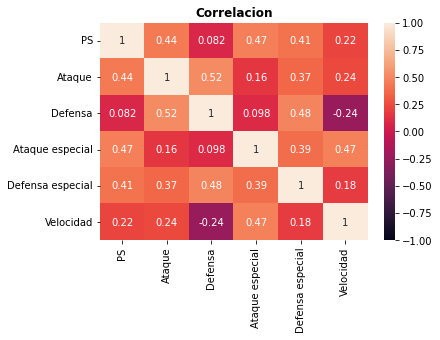

In [14]:
ax = plt.axes()
sns.heatmap(data_transformed.corr(),vmin=-1, vmax=1, annot=True);
ax.set_title('Correlacion',weight='bold')
plt.show()

En el mapa de calor se puede visualizar claramente que variables como ataque y defensa estan mas relacionadas entre si que por ejemplo velocidad y defensa que claramente no tienen apenas relacion.

Usamos la funcion linalg.eig de numpy para obtener los autovalores y autovectores de nuestra matriz de correlacion. Estos valores son los que nos indicaran con cuantos componentes quedarnos.

In [15]:
from numpy import linalg
autoval, autovec= np.linalg.eig(data_corr)
print("Los autovalores son")
print(autoval)
print("Los autovectores son")
print(autovec)

Los autovalores son
[2.49848047 1.4731284  0.15599543 0.45086785 0.67974537 0.74178248]
Los autovectores son
[[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]]


Visualizemos cuanto porciento de nuestros datos representa cada autovalor. Esto se calcula dividiendo cada autovalor por el total de la suma de autovalores.

Ademas comprobaremos que este calculo sea correcto ya que la suma de dichos portentajes ha de dar 1.

In [16]:
comp= autoval/len(autoval)

print("Porcentaje de Varianza de cada componente: \n", comp)

print("Suma de los porcentajes"), sum(autoval/sum(autoval))

Porcentaje de Varianza de cada componente: 
 [0.41641341 0.2455214  0.02599924 0.07514464 0.1132909  0.12363041]
Suma de los porcentajes


(None, 1.0000000000000002)

Ordenamos las varianzas en orden descendiente para evaluar las componentes mas significativas.

In [17]:
comp_ord=pd.DataFrame(data=comp,  index = ['Componente 1','Componente 2','Componente 3','Componente 4','Componente 5','Componente 6'], columns=['Varianza cada componente'])
comp_ord.sort_values('Varianza cada componente',inplace=True)
comp_ord[::-1]




,Varianza cada componente
Componente 1,0.416413
Componente 2,0.245521
Componente 6,0.123630
Componente 5,0.113291
Componente 4,0.075145
Componente 3,0.025999


In [18]:
comp_2=[]
comp_aux= comp_ord['Varianza cada componente'].to_numpy()
comp_2=comp_aux[::-1]

In [19]:

autovalaux=0
autoval_sum=0
autoval_acc=[]
for i in range(6):
    autovalaux = autovalaux + comp_2[i]
    autoval_sum = (autovalaux/np.sum(comp))*100
    autoval_acc.append(autoval_sum)
autoval_acc=pd.DataFrame(data=autoval_acc,  index = ['Componente 1','Componente 2','Componente 3','Componente 4','Componente 5','Componente 6'], columns=['Varianza acumulada'])
autoval_acc.sort_values('Varianza acumulada',inplace=True)
autoval_acc


,Varianza acumulada
Componente 1,41.641341
Componente 2,66.193481
Componente 3,78.556522
Componente 4,89.885612
Componente 5,97.400076
Componente 6,100.000000


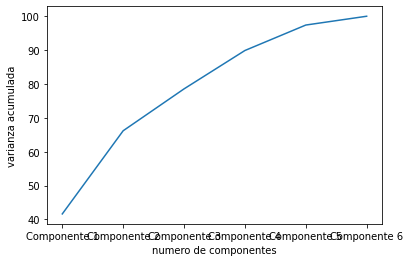

In [20]:
#Ademas graficamos la varianza acumulada

plt.plot(autoval_acc)
plt.xlabel('numero de componentes')
plt.ylabel('varianza acumulada')
plt.show()

Podemos observar que la varianza acumulada que con dos componentes representamos el 66% de los datos estando repartidos un 41.6% con la primera componente y 24.5% con la segunda. Esto significa que estamos perdiendo un 44% de los datos, una cantidad signficativa. 

La terecera componente suma un 13% haciendo que el porcentaje acumulado sea del 79%. Sin embargo usando una 4 componente representariamos el 90% de los datos, algo que se considera optimo en PCA. 

Vamos a graficar con un diagrama de dispersion las dos primeras componentes para estudiar mejor su relacion.

# Diagrama de Dispersion


Multiplicando valor del autovector asociado a la componente por el vector de atributos de ese Pokemon podemos calcular el valor de dicho pokemon en su componente.

Para ello es necesario almacenar los valores de cada pokemon en cada componente. Creamos dos matrices que representen estos datos que rellenraremos usando el metodo to_numpy() para pasar el DataFrame a una matriz con la que poder indexar nuestros valores.

Ademas señalaremos 4 puntos en nuestro diagrama de dispersion los cuales luego vamos a analizar en detalle para entender que nos estan indicando.



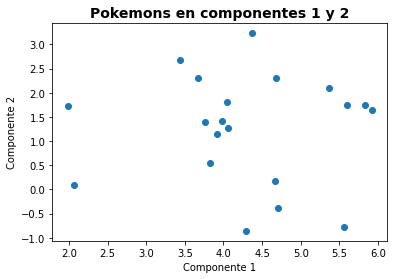

In [27]:
# Creamos dos matrices de zeros que iremos rellenando con los valores de las dos priemras componentes y transformamos n
pkmn_comp1 = np.zeros(len(data.index))
pkmn_comp2 = np.zeros(len(data.index))

data_mat = data.to_numpy()

for i in range(len(data.index)):
  for j in range(len(data.columns)):
    pkmn_comp1[i] = pkmn_comp1[i] + autovec[0][j] * data_mat[i][j]
    pkmn_comp2[i] = pkmn_comp2[i] + autovec[1][j] * data_mat[i][j]
fig, ax = plt.subplots()
ax.scatter(pkmn_comp1, pkmn_comp2)
ax.set_title('Pokemons en componentes 1 y 2', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.show()

La grafica representa la posicion de los 20 pokemon en funcion de la priemra y segunda componente. Es interesante explicar porque no hay linealidad en nuestros datos. Es decir se ve que no seria posible pintar una recta de regresion que este centrada para todos los valores. Esto es asi precisamente porque el objetivo del PCA es explicar la mayor cantidad de informacion con el menor numero de variables posible. Si la Componente 1 y la 2 tuviesen muchos datos explicados por las mismas variables estariamos representando la misma informacion con menos variables, algo que es mucho menos eficiente. Veamos que atributos expresan las componentes 1 y 2 para asi saber cuales de los distintos STATS de los Pokemon son los mas significativos.

In [22]:
sumcomp1 = abs(autovec[0]/sum(abs(autovec)))
df_sumcomp1 = pd.DataFrame(sumcomp1, index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Explicación atributos componente 1'])

sumcomp2 = abs(autovec[1]/sum(abs(autovec)))
df_sumcomp2 = pd.DataFrame(sumcomp2, index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Explicación atributos componente 2'])

df_concat = pd.concat([df_sumcomp1,df_sumcomp2],axis=1)
df_concat

,Explicación atributos componente 1,Explicación atributos componente 2
PS,0.188782,0.187199
Ataque,0.072890,0.115899
Defensa,0.159372,0.208106
Ataque especial,0.039393,0.053762
Defensa especial,0.424151,0.013170
Velocidad,0.033056,0.331288


El porcetnaje de explicacion de calcula diviendo el valor de los autovectores de esa componente entre la suma de estos. Posteriormente usamos la funcion df.concat para mostrar la explicacion de cada atributo en un mismo DataFrame y sea mas facil de leer.

En este caso podemos ver claramente que para la componente 1 los atributos de "Defensa Especial" y "PS" son los mas representados por esta con un 42% y 19% respectivamente.

Por otra parte para la segunda componente son "Defensa" y "Velocidad" con un 33% y un 21% respectivamente. 

Que las dos Componentes no tengan atributos en comun entre los dos mas explicados tiene sentido ya que es precismente lo que pretende lograr el PCA, con la menor cantidad de componentes posibles representar la mayor cantidad de datos. Ademas es interesnate que la explicacion de "Defensa Especial" en la segunda componente sea el valor mas bajo de explicacion de esta lo que indica que la mayoria de "Defensa Especial" esta siendo valorada por la componente 1.  Sin embargo cabe resaltar que el hecho de que tanto la componente 1 como la 2 expliquen el "PS" con un 19% nos hace entender que podemos mejorar este modelo ya este atributo esta siendo explicado por dos componentes, algo que lo hace menos optimo.

Una vez entendida la explicacion de cada atributo de cada componente podemos proceder a analizar 4 puntos especificos de la grafica. Para ello se cambiaran de color 4 puntos en espeficico de la grafica.

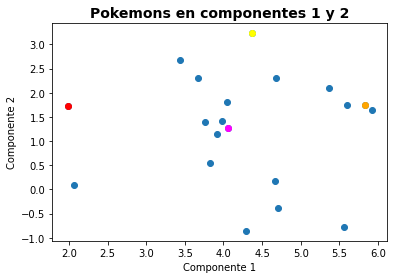

,Abomasnow,Jolteon,Pikachu,Giratina
PS,3,2,1,4
Ataque,3,2,2,4
Defensa,2,2,1,3
Ataque especial,3,4,2,4
Defensa especial,2,3,1,3
Velocidad,2,5,3,3


In [30]:
fig, ax = plt.subplots()
ax.scatter(pkmn_comp1, pkmn_comp2)
#Pintamos los puntos de interes de otro color para resaltarlos
ax.scatter(pkmn_comp1[14], pkmn_comp2[14], color = 'red')
ax.scatter(pkmn_comp1[17], pkmn_comp2[17], color = 'orange')
ax.scatter(pkmn_comp1[9], pkmn_comp2[9], color = 'magenta')
ax.scatter(pkmn_comp1[12], pkmn_comp2[12], color = 'yellow')
ax.set_title('Pokemons en componentes 1 y 2', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.show()

#Mostramos un DataFrame con los Pokemon elegidos y sus atributos
df_9 = pd.DataFrame(data_mat[9], index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Abomasnow'])
df_12 = pd.DataFrame(data_mat[12], index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Jolteon'])
df_14 = pd.DataFrame(data_mat[14], index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Pikachu'])
df_17 = pd.DataFrame(data_mat[17], index= ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"], columns=['Giratina'])

df_pkconcat = pd.concat([df_9,df_12,df_14,df_17],axis=1)
df_pkconcat

El primer punto interesante que analizar es el punto magenta referente al pokemon Abomasnow. Hemos elegido este punto porque es el mas centrico de nuestro diagrama de dispersion por tanto podriamos concluir que el Pokemon al que este punto pertenece es uno con valores medios de "Defensa Especial", "PS", "Defensa" y "Velocidad". Teniendo en cuanta que los valores de las estadisticas de cada pokemon van de 1 a 5 observamos como Abomasnow tiene todos los valores de sus atributos como 2 o 3 lo que concuerda con nuestro razonamiento. 

El punto rojo hace refereincia al pokemon Pikachu. Hemos elegido este punto porque en el vemos que segun el diagrama de dispersion tiene muy poco peso para la primera componente pero mucho para la segunda. Es decir, deberia tener poca Defensa Especial pero mucha Velocidad. En este caso vamos que el unico valor en el que tiene mas de 2 puntos en el Velocidad que tiene 3 por tanto vamos que sus estadisticas van acorde con lo representado por la grafica.

El siguiente punto a analizar es el Naraja referente al pokemon Giratina. En este punto vemos que esperamos valores altos para la primera componente y vemos que tiene estadisticas mas altas que la media y ademas para PS y Def Esp tiene 4 y 3 puntos lo que indica un gran peso en la primera componente ya los dos valores mas representados por la componente son altos. Ademas son altos en la segunda componente tambien pero esta, al tener menos peso que la primera, los datos se ven menos alterados por cambios en esos valores. 

Por ultimo nos centraremos en el punto amarillo, refernte a Jolteon. Vemos que tiene el valor mas alto de todos para la segunda componente lo que indicaria que este Pokemon tiene un valor muy alto en "Velocidad". Mirando en la tabla vemos que efectivamente tiene la maxima puntuacion en velocidad 5 por lo que la segunda componente tiene mucho peso para este Pokemon. Ademas vemos que los atributos de la primera componente estan en la media y por eso esta tan arriba para la segunda componente pero centrado en la primera. Es decir, Jolteon es un buen pokemon en Velocidad pero en la media para Defensa Especial y PS.

# Apartado 4

Para este apartado se nos pide usar la libreria scikit-learn para realizar los mismos pasos que en los apartados anteriores. Como en el apartado 1 limpiamos y normalizamos nuestro DataFrame vamos a partir de ahi. 

In [24]:

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
pca=PCA(n_components=0.95)
pca.fit(data_transformed)
data_pca=pca.transform(data_transformed)
data_pca


array([[ 0.07460611, -1.31149507,  0.40635393,  0.55391508,  0.29082839],
       [ 1.06156513, -0.12361938,  0.88795268, -0.05047351, -0.61544119],
       [ 0.40138774,  2.17319805, -0.37385539, -0.23735387,  1.05633782],
       [-2.4973882 ,  0.02984208,  1.31613204,  0.13463962, -0.01988458],
       [-0.32392296, -0.52148558,  0.26952027,  0.90048508,  0.70586177],
       [-2.37519112, -0.57566287,  0.17377563,  0.17393135,  0.39502732],
       [-0.37790141, -1.05701597, -1.10223713, -0.76419515, -0.62730212],
       [ 1.21029374, -0.07979217, -0.07293971, -1.57334516, -0.67798057],
       [-0.22509755,  1.73011396,  1.36637411,  0.66912612,  0.33056396],
       [ 0.35328174, -0.13786839,  0.28888141, -1.48113417, -0.03119192],
       [ 3.73931858,  0.373642  , -0.75653218, -0.23039978,  0.42116712],
       [ 0.57196059,  0.15009498,  1.64004144, -0.02401388, -0.49950281],
       [-0.28916959, -1.89885207, -0.59449695,  1.20510273, -0.83613209],
       [-0.18704221,  0.19531287, -0.7